# Lesson 4 - Seven Segments Display #
We can create a combinational circuit that converts an hexadecimal digit into a representation in a seven segments display   

In [ ]:
import sys
import platform
if (platform.uname().node == 'TPY14'):
    print('Dev machine')
    sys.path.append('..\\..\\..\\py4hw')

In [2]:
import math
import numpy as np
import py4hw
import matplotlib.pyplot as plt

### The combinational functions of a seven segments display ###
A seven segments digplay is usually implemented with 7 LEDs organized as follows 

<pre>
   ___
 _|_a_|_
| |   | |
|f|   |b|
|_|___|_|
  |_g_|
| |   | |
|e|   |c|
|_|___|_|
  |_d_|
  
</pre>

actually, we can have LED[6..0] = {gfedcba}

We have to do the following table:

| value | gfedcba |
| --- | --- |
| 0000 | 0111111 |
| 0001 | 0000110 |
| 0010 | 1011011 |
| 0011 | 1001111 |
| 0100 | 1100110 |
| 0101 | 1101101 |
| 0110 |  |
| 0111 |  |
| 1000 |  |
| 1001 |  |
| 1010 |  |
| 1011 |  |
| 1100 |  |
| 1101 |  |
| 1110 |  |
| 1111 |  |

a = 0 , 2 , 3 , 5 , 6 , 7 , 8 , 9 , 0xA , 0xC , 0xE , 0xF

b = 0 , 1 , 3, 4, 7, 8, 9, 0xA, 0xd

c = 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0xA, 0xb, 0xd

d = 0, 2, 3, 5, 6, 8, 0xb, 0xC, 0xd, 0xE

e = 0, 2, 6, 8, 0xA, 0xb, 0xC, 0xd, 0xE, 0xF

f = 0, 4, 5, 6, 8, 9, 0xA, 0xb, 0xC, 0xE, 0xF

g = 2, 3, 4, 5, 6, 8, 9, 0xA, 0xb, 0xd, 0xE, 0xF

In [6]:
class Digit7Segment(py4hw.Logic):
    def __init__(self, parent, name, v, led):
        super().__init__(parent, name)
        
        assert(led.getWidth() == 7)
        
        self.addIn('v', v)
        self.addOut('led', led)
        
        
        a_minterms = [0,2,3,5,6,7,8,9,0xA,0xC,0xE,0xF]
        b_minterms = [0,1,2,3,4,7,8,9,0xA,0xd]
        c_minterms = [0,1,3,4,5,6,7,8,9,0xA,0xb,0xd]
        d_minterms = [0,2,3,5,6,8,0xb,0xC,0xd,0xE]
        e_minterms = [0,2,6,8,0xA,0xb,0xC,0xd,0xE,0xF]
        f_minterms = [0,4,5,6,8,9,0xA,0xb,0xC,0xE,0xF]
        g_minterms = [2,3,4,5,6,8,9,0xA,0xb,0xd,0xE,0xF]
        
        
        a = self.wire('a')
        b = self.wire('b')
        c = self.wire('c')
        d = self.wire('d')
        e = self.wire('e')
        f = self.wire('f')
        g = self.wire('g')
        
        na = self.wire('na')
        nb = self.wire('nb')
        nc = self.wire('nc')
        nd = self.wire('nd')
        ne = self.wire('ne')
        nf = self.wire('nf')
        ng = self.wire('ng')
        
        py4hw.ConcatenateLSBF(self, 'led', [a,b,c,d,e,f,g], led)
        
        py4hw.SumOfMinterms(self, 'a', v, a_minterms, na)
        py4hw.SumOfMinterms(self, 'b', v, b_minterms, nb)
        py4hw.SumOfMinterms(self, 'c', v, c_minterms, nc)
        py4hw.SumOfMinterms(self, 'd', v, d_minterms, nd)
        py4hw.SumOfMinterms(self, 'e', v, e_minterms, ne)
        py4hw.SumOfMinterms(self, 'f', v, f_minterms, nf)
        py4hw.SumOfMinterms(self, 'g', v, g_minterms, ng)
        
        py4hw.Not(self, 'na', na, a)
        py4hw.Not(self, 'nb', nb, b)
        py4hw.Not(self, 'nc', nc, c)
        py4hw.Not(self, 'nd', nd, d)
        py4hw.Not(self, 'ne', ne, e)
        py4hw.Not(self, 'nf', nf, f)
        py4hw.Not(self, 'ng', ng, g)

### Custom visual feedback ###
One of the main benefits of using python is that we can use it to create visual feedback from the collected values to simplify the interpretation of the signals. Hence, verification is much simpler than looking at waveforms.

In [7]:

def drawSevenSegments(i, v):
    plt.subplot(1,16,i+1)

    sp = 0.5
    ll = 5
    hx = np.array([0, sp, ll-sp, ll, ll-sp, sp])
    hy = np.array([0, sp, sp, 0, -sp, -sp])
    vx = np.array([0, sp, sp, 0, -sp, -sp])
    vy = np.array([0, sp, ll-sp, ll, ll-sp, sp])
    led_x=[None]*7
    led_y=[None]*7

    led_x[0] , led_y[0] = hx , hy + 2*ll     # LED a
    led_x[1] , led_y[1] = vx + ll, vy + ll     # LED b
    led_x[2] , led_y[2] = vx + ll, vy      # LED c
    led_x[3] , led_y[3] = hx , hy     # LED d
    led_x[4] , led_y[4] = vx , vy      # LED e
    led_x[5] , led_y[5] = vx , vy + ll     # LED f
    led_x[6] , led_y[6] = hx , hy + ll     # LED g
    
    vi = v.get()
    for i in range(7):
        if (not(vi & 1)):
            plt.fill(led_x[i], led_y[i], edgecolor='black', facecolor='red')
        vi = vi >> 1
    
    plt.xlim(-sp,ll+sp)
    plt.ylim(-sp, 2*ll+sp)
    plt.axis('off')


### Testing ###
We do a simple test iterating all the hexadecimal values

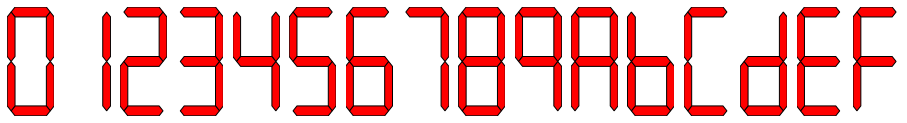

In [10]:
hw = py4hw.HWSystem() 
hlp = py4hw.LogicHelper(hw)

w = hw.wire('w', 4)
led = hw.wire('led', 7)
reset = hlp.hw_constant(1,0)
inc = hlp.hw_reg(hlp.hw_constant(1,1))

py4hw.Counter(hw, 'count', inc=inc, reset=reset, q=w)
Digit7Segment(hw, 'seve', w, led)

plt.figure(figsize=(16,2))

for i in range(16):
    hw.getSimulator().clk()
    drawSevenSegments(i, led)
    

plt.show()

In [8]:
class TestLED(py4hw.Logic):
    def __init__(self, parent, name, values, leds):
        super().__init__(parent, name)
        
        values = values.copy()
        values.reverse()
        
        for idx, led in enumerate(leds):
            self.addOut('led{}'.format(idx), led)
            
            v =  self.wire('v{}'.format(idx), 4)
            #lw =  self.wire('led{}'.format(idx), 7)

            py4hw.Constant(self, 'k{}'.format(idx), values[idx], v)
            Digit7Segment(self, 'sv{}'.format(idx), v, led)

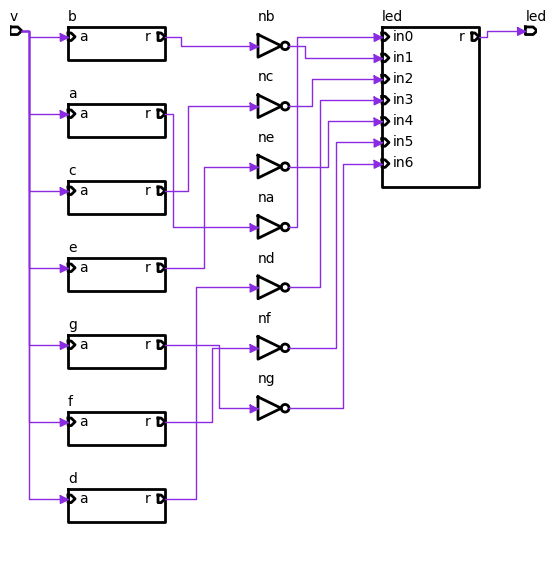

In [9]:
hw = py4hw.HWSystem() 

leds = []
for i in range(6):
    w = hw.wire('led{}'.format(i), 7)
    leds.append(w)
    
#dut = TestLED(hw, 'test', [0xC, 0xA, 0xF, 0xE, 0x2, 0x3], leds)
dut = TestLED(hw, 'test', [3, 0, 0, 3, 2, 3], leds)

sch = py4hw.Schematic(dut.children['sv0'])
sch.draw()

### Generating Verilog ###
The current Verilog generation generates a module for every instance of the hierarchy.
This is inneficient because it generates a long descriptions, while many modules are exactly the same.
Although this is a current issue, soon, in future releases this will be solved.

The previous example was synthesized and tested in a Terasic DE1 board.
![DE1 demo](DE1.jpg)

In [12]:
rtl = py4hw.VerilogGenerator(dut)
print(rtl.getVerilogForHierarchy())

// This file was automatically created by py4hw RTL generator
module TestLED (
	output [6:0] led0,
	output [6:0] led1,
	output [6:0] led2,
	output [6:0] led3,
	output [6:0] led4,
	output [6:0] led5);
wire [3:0] w_v0;
wire [3:0] w_v4;
wire [3:0] w_v2;
wire [3:0] w_v1;
wire [3:0] w_v5;
wire [3:0] w_v3;

assign w_v0[3:0] = 3;
Digit7Segment_2b120941988 i_sv0(.v(w_v0),.led(led0));
assign w_v1[3:0] = 2;
Digit7Segment_2b120b5e248 i_sv1(.v(w_v1),.led(led1));
assign w_v2[3:0] = 3;
Digit7Segment_2b120cc7408 i_sv2(.v(w_v2),.led(led2));
assign w_v3[3:0] = 0;
Digit7Segment_2b120e316c8 i_sv3(.v(w_v3),.led(led3));
assign w_v4[3:0] = 0;
Digit7Segment_2b120f969c8 i_sv4(.v(w_v4),.led(led4));
assign w_v5[3:0] = 3;
Digit7Segment_2b121101c88 i_sv5(.v(w_v5),.led(led5));
endmodule

// This file was automatically created by py4hw RTL generator
module Digit7Segment_2b120941988 (
	input [3:0] v,
	output [6:0] led);
wire w_f;
wire w_c;
wire w_nf;
wire w_na;
wire w_ne;
wire w_a;
wire w_d;
wire w_nd;
wire w_g;
wir